In [147]:
# Import libries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



In [148]:
# Import dataframes AND Specify a custom delimiter for the CSV input (sep=' ')

red_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-red.csv', sep=';')
white_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-white.csv',sep=';')

In [149]:
# Checking null values

red_df.isnull().sum()
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [150]:
red_df.head(15)
white_df.sort_values(['quality'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3307,9.4,0.24,0.29,8.5,0.037,124.0,208.0,0.99395,2.90,0.38,11.0,3
445,7.1,0.32,0.32,11.0,0.038,16.0,66.0,0.99370,3.24,0.40,11.5,3
2050,11.8,0.23,0.38,11.1,0.034,15.0,123.0,0.99970,2.93,0.55,9.7,3
3810,6.8,0.26,0.34,15.1,0.060,42.0,162.0,0.99705,3.24,0.52,10.5,3
3409,6.2,0.23,0.35,0.7,0.051,24.0,111.0,0.99160,3.37,0.43,11.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
820,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9


In [151]:
#creating new column

red_df['quality_label']= red_df['quality'].apply(lambda value: 'low' 
if value <= 5 else 'medium'
if value <=7 else 'high')

white_df['quality_label']= white_df['quality'].apply(lambda value: 'low' 
if value <= 5 else 'medium'
if value <=7 else 'high')



In [152]:
# transforming these labels into categrical data type

red_df['quality_label'] = pd.Categorical(red_df['quality_label'],
categories=['low', 'medium', 'high'])

white_df['quality_label'] = pd.Categorical(white_df['quality_label'],
categories=['low', 'medium', 'high'])

In [153]:
# Combine the two datasets into wines.

red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

wines = pd.concat([red_df, white_df])

In [154]:
# Re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

wines


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,high,white
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,low,red
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium,white
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,medium,white
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,medium,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5,low,white
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,medium,white
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,low,white
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5,low,white


In [155]:
comparative_df= pd.concat([red_df.describe(), white_df.describe()], axis='columns', keys=['Red Wine', 'White Wine'])

comparative_df.head()

Red Wine                                                            \
      fixed acidity volatile acidity  citric acid residual sugar    chlorides   
count   1599.000000      1599.000000  1599.000000    1599.000000  1599.000000   
mean       8.319637         0.527821     0.270976       2.538806     0.087467   
std        1.741096         0.179060     0.194801       1.409928     0.047065   
min        4.600000         0.120000     0.000000       0.900000     0.012000   
25%        7.100000         0.390000     0.090000       1.900000     0.070000   

                                                                          \
      free sulfur dioxide total sulfur dioxide      density           pH   
count         1599.000000          1599.000000  1599.000000  1599.000000   
mean            15.874922            46.467792     0.996747     3.311113   
std             10.460157            32.895324     0.001887     0.154386   
min              1.000000             6.000000     0.990070     2.740000   
25%              7.000000            22.000000     0.995600     3.210000   

                    ...   White Wine                              \
         sulphates  ...  citric acid residual sugar    chlorides   
count  1599.000000  ...  4898.000000    4898.000000  4898.000000   
mean      0.658149  ...     0.334192       6.391415     0.045772   
std       0.169507  ...     0.121020       5.072058     0.021848   
min       0.330000  ...     0.000000       0.600000     0.009000   
25%       0.550000  ...     0.270000       1.700000     0.036000   

                                                                          \
      free sulfur dioxide total sulfur dioxide      density           pH   
count         4898.000000          4898.000000  4898.000000  4898.000000   
mean            35.308085           138.360657     0.994027     3.188267   
std             17.007137            42.498065     0.002991     0.151001   
min              2.000000             9.000000     0.987110     2.720000   
25%             23.000000           108.000000     0.991723     3.090000   

                                              
         sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  
mean      0.489847    10.514267     5.877909  
std       0.114126     1.230621     0.885639  
min       0.220000     8.000000     3.000000  
25%       0.410000     9.500000     5.000000  

[5 rows x 24 columns]

       wine_type
white       4898
red         1599


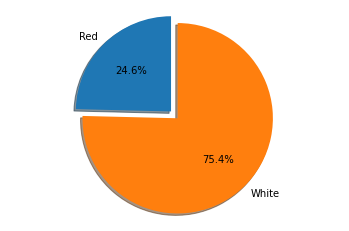

In [156]:
# Pie chart wine Red/White:

wine_ammount=pd.DataFrame(data=(wines['wine_type'].value_counts()))
print(wine_ammount)


labels = 'Red', 'White'
sizes = [wine_ammount.iloc[1,0], wine_ammount.iloc[0,0]]
explode = (0.1, 0.0)  
# "explode" the 1st slice (Red)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

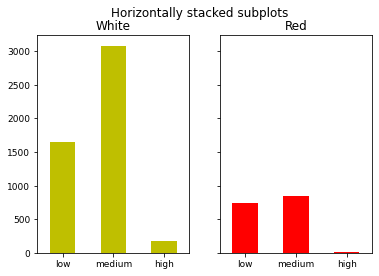

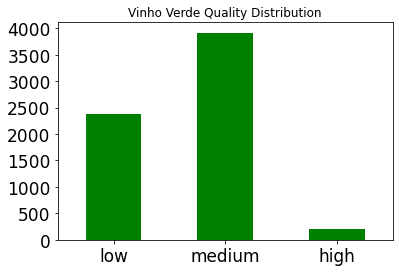

In [157]:
# Plot to show the distribution of qualities

label_sort=pd.Categorical(['low', 'medium', 'high'], ordered=True)

qred=pd.DataFrame(data=(red_df['quality_label'].value_counts().sort_index(level=label_sort)))
qwhite=pd.DataFrame(data=(white_df['quality_label'].value_counts().sort_index(level=label_sort)))
quality=pd.DataFrame(data=(wines['quality_label'].value_counts().sort_index(level=label_sort)))

figure, axes = plt.subplots(1, 2, sharey=True)
plt.subplots_adjust(hspace=.0)
qwhite.plot(ax=axes[0], kind='bar', rot=0, fontsize=9, legend=None, color='y'); axes[0].set_title('White')
qred.plot(ax=axes[1], kind='bar', rot=0, fontsize=9, legend=None, color='r'); axes[1].set_title('Red')
figure.suptitle('Horizontally stacked subplots');

quality.plot(y="quality_label", kind="bar", rot=0, fontsize=17, legend=None, color='g').set_title('Vinho Verde Quality Distribution');



In [158]:
# Boxplot Using Matplotlib

# plt.boxplot(wines[wines['quality_label'] == 'low']['alcohol'], wines[wines['quality_label'] == 'medium']['alcohol'], wines[wines['quality_label'] == 'high']['alcohol'])#, patch_artist=True, boxprops=dict(facecolor='g', color='k'), medianprops=dict(color='k'))#,labels=['low', 'medium', 'high'])
# plt.title("Boxplot Using Matplotlib")
# plt.show()

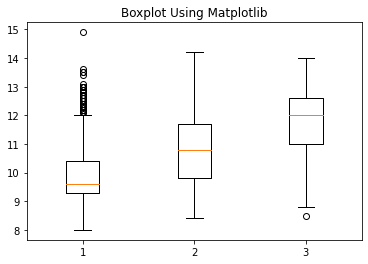

In [159]:

#Alternative Boxplotting

q_low=wines[wines['quality_label'] == 'low']['alcohol']
q_medium=wines[wines['quality_label'] == 'medium']['alcohol']
q_high=wines[wines['quality_label'] == 'high']['alcohol']

q_label=[q_low,q_medium,q_high]

plt.boxplot(q_label)
# patch_artist=True, 
# boxprops=dict(facecolor='g', color='k'), 
# medianprops=dict(color='k')) 
# labels=['low', 'medium', 'high'])
plt.title("Boxplot Using Matplotlib")
plt.show()

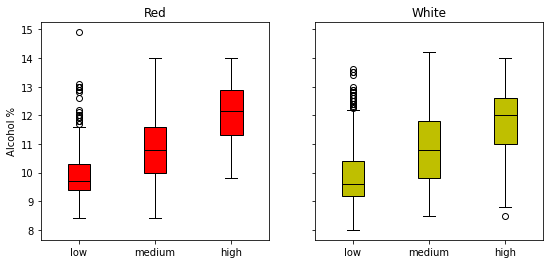

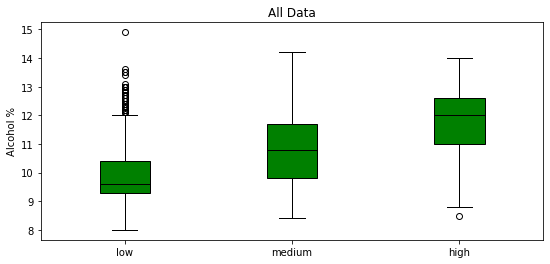

In [160]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

# rectangular box plot
bplot1 = ax1.boxplot([red_df[red_df['quality_label'] == 'low']['alcohol'], red_df[red_df['quality_label'] == 'medium']['alcohol'], red_df[red_df['quality_label'] == 'high']['alcohol']],
                     patch_artist=True,  # fill with color
                     boxprops=dict(facecolor='r', color='k'), #Color box
                     medianprops=dict(color='k'), #Mean color
                     labels=['low', 'medium', 'high'])  # will be used to label x-ticks
ax1.set_title('Red')
ax1.set_ylabel('Alcohol %')

bplot2 = ax2.boxplot([white_df[white_df['quality_label'] == 'low']['alcohol'], white_df[white_df['quality_label'] == 'medium']['alcohol'], white_df[white_df['quality_label'] == 'high']['alcohol']],
                     patch_artist=True,  
                     boxprops=dict(facecolor='y', color='k'), 
                     medianprops=dict(color='k'), 
                    labels=['low', 'medium', 'high'])
ax2.set_title('White')
plt.show()

fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)
quality_boxplot = ax.boxplot([wines[wines['quality_label'] == 'low']['alcohol'], wines[wines['quality_label'] == 'medium']['alcohol'], wines[wines['quality_label'] == 'high']['alcohol']],
                     patch_artist=True,  
                     boxprops=dict(facecolor='g', color='k'), 
                     medianprops=dict(color='k'), 
                    labels=['low', 'medium', 'high'])
ax.set_title('All Data')
ax.set_ylabel('Alcohol %')
plt.show()

In [161]:
# Alcohol level vary significantly among the low quality, medium quality and high quality wines?

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'],
wines[wines['quality_label'] == 'medium']['alcohol'],
wines[wines['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 673.0745347231032 	p-value: 2.2715337450621843e-266


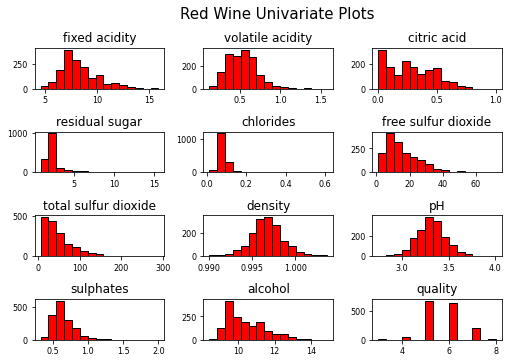

In [162]:
#Univariate Analysis Red

red_df.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

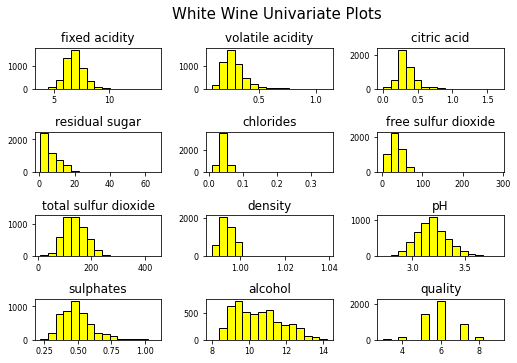

In [163]:
#Univariate Analysis White

white_df.hist(bins=15, color='yellow', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

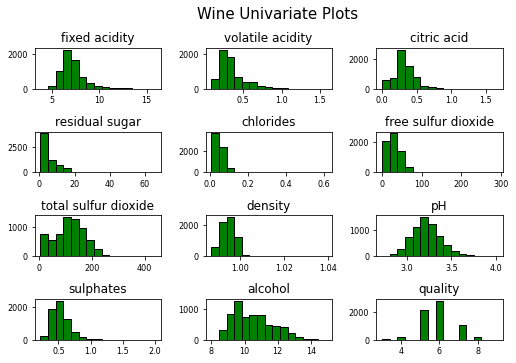

In [164]:
#Univariate Analysis Wine

wines.hist(bins=15, color='green', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

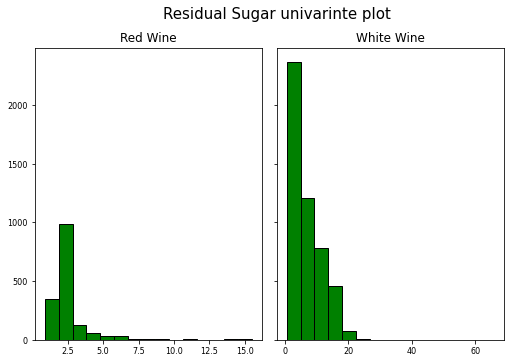

In [165]:
# Residual Sugar univarinte plot

sugar_red=wines[wines['wine_type'] == 'red']['residual sugar']
sugar_white=wines[wines['wine_type'] == 'white']['residual sugar']

comparative_sugar= pd.concat([sugar_red, sugar_white], axis='columns', keys=['Red Wine', 'White Wine'])

comparative_sugar.hist(bins=15, color=('green'), edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False, sharey=True)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.ylabel("PORCODIO!")
rt = plt.suptitle('Residual Sugar univarinte plot', x=0.65, y=1.25, fontsize=15)


In [166]:
# Scarterplotinprogress

q_low_df=wines[wines['quality_label'] == 'low']
q_3=red_df[red_df['residual sugar'] == "7"]

# q_medium_df=wines[wines['quality_label'] == 'medium']
# q_high_df=wines[wines['quality_label'] == 'high']

# for column in q3.columns[0:-3]:
#     plt.scatter(q3['total sulfur dioxide'], q3[column])
#     plt.title('SO2 vs other attributes')
#     plt.ylabel(column)
#     plt.xlabel('SO2')
#     plt.show()

q_3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type


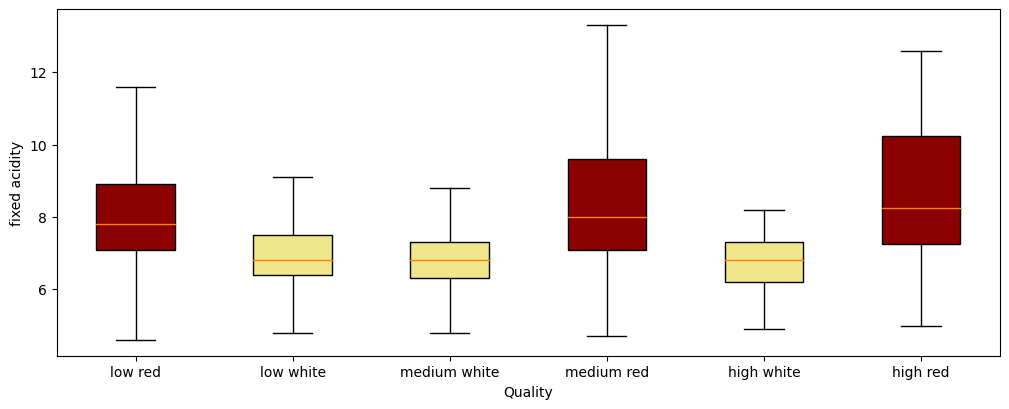

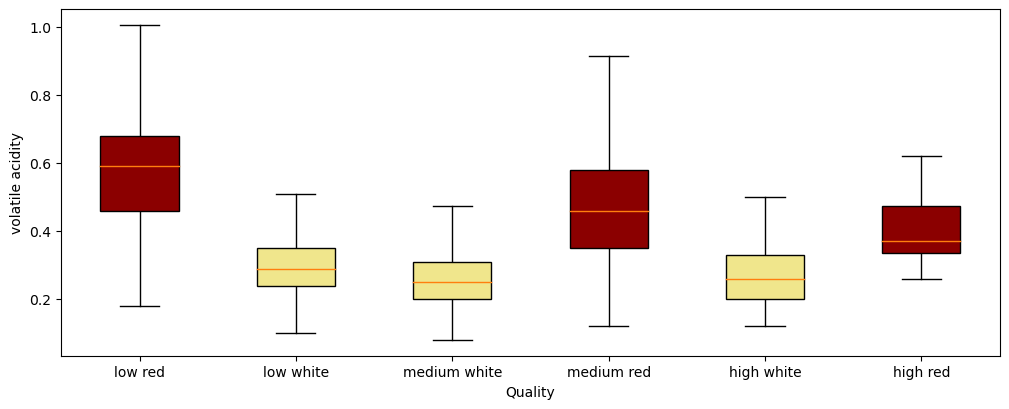

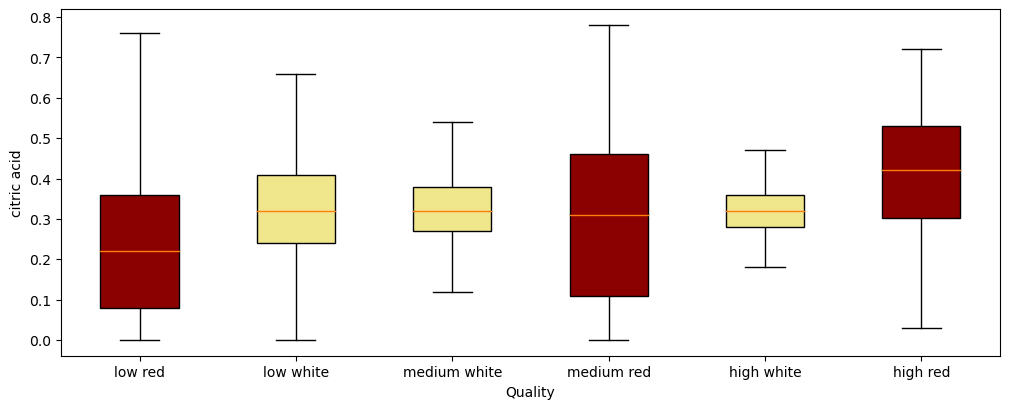

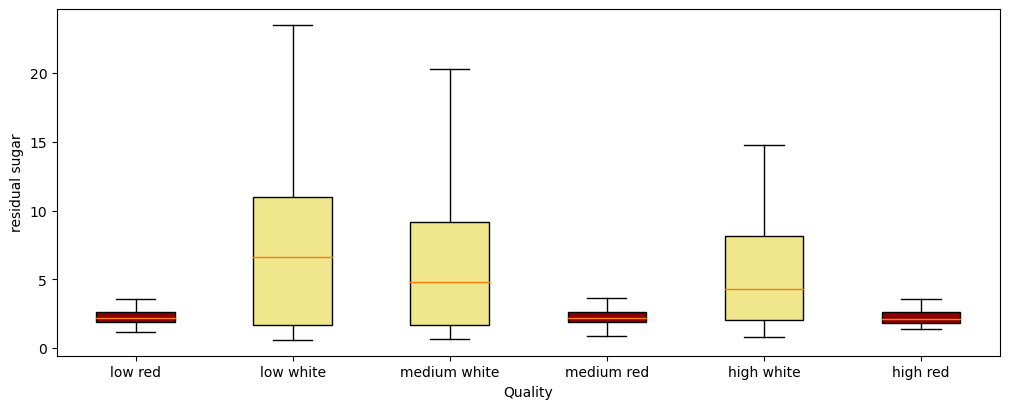

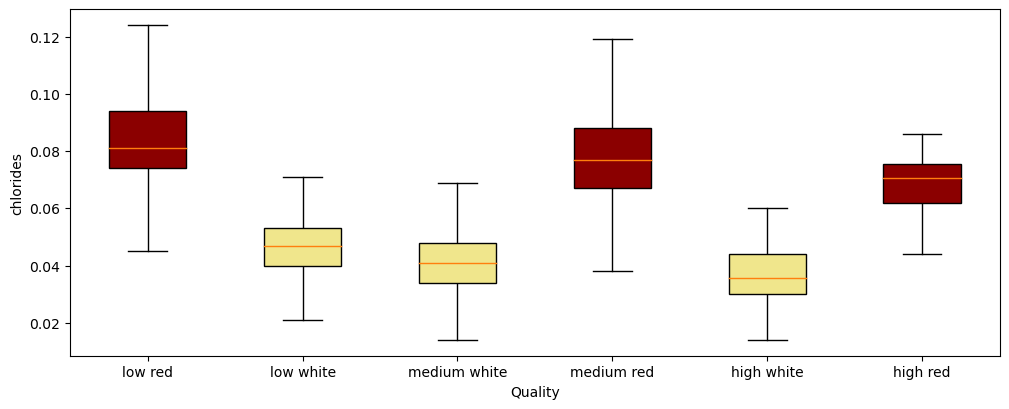

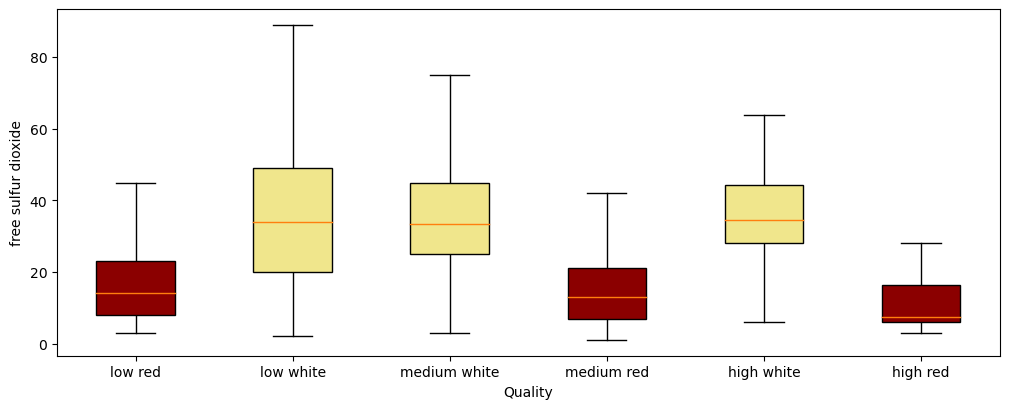

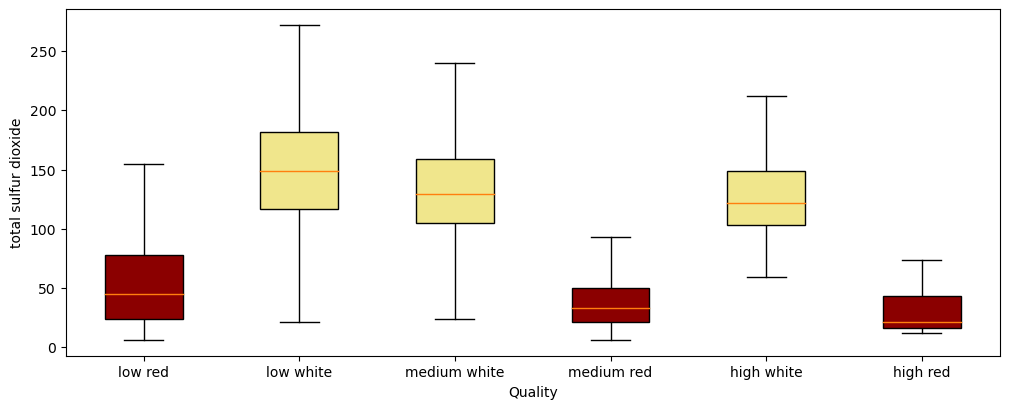

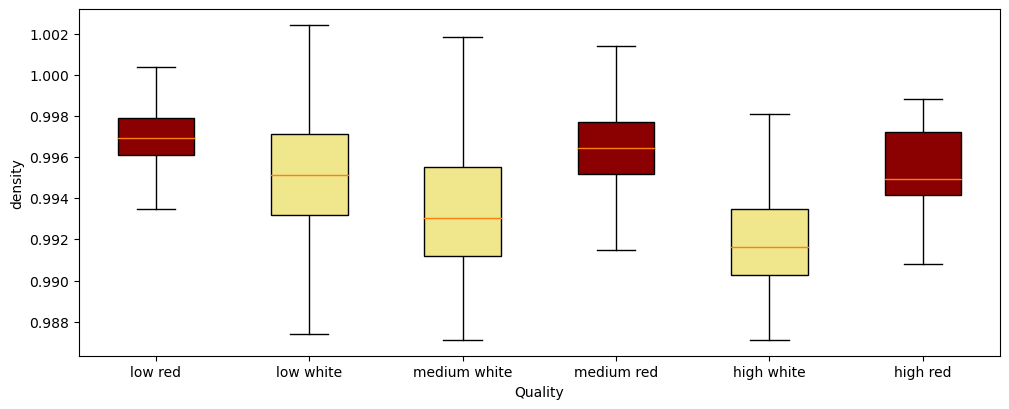

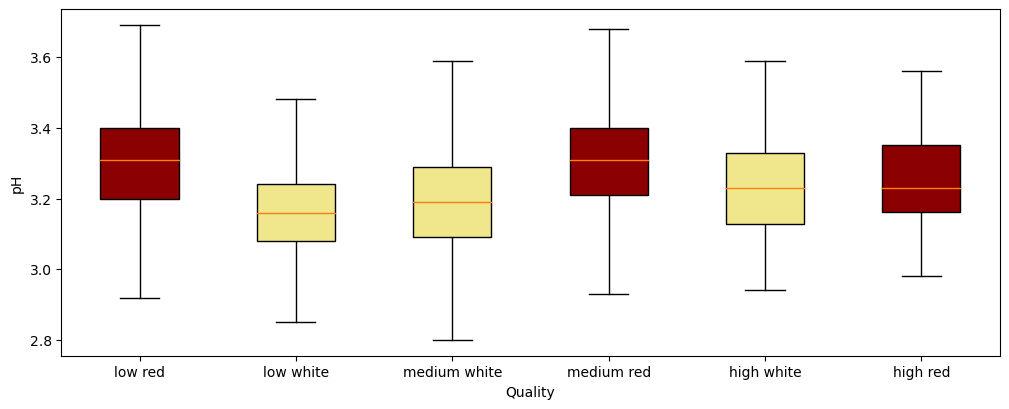

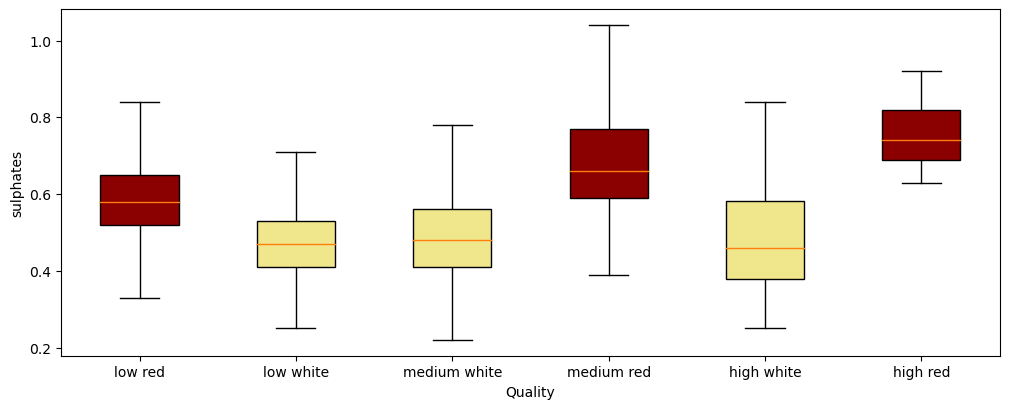

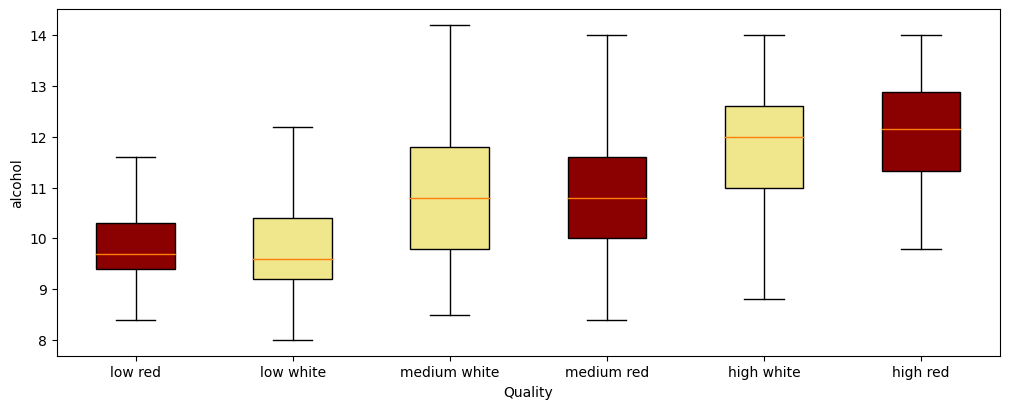

In [167]:
#Killian boxplot

for column in wines.columns[0 : -3]:
        quality_list = ['low', 'medium-low', 'medium', 'medium-high', 'high']
        quality_column = {}
        colors = []
        fig = plt.figure(figsize=(10, 4), dpi=100)
        for i in quality_list:
                for j in wines[wines["quality_label"] == i]["wine_type"].unique():
                        label = i + " " + j
                        quality_column[label] = wines[(wines['quality_label']==i) & (wines["wine_type"]==j)][column]
                        colors.append("khaki" if j == "white" else "darkred")
        bplot = plt.boxplot([x for x in quality_column.values()],labels=[x for x in quality_column.keys()], patch_artist=True, showfliers=False)
        for patch, color in zip(bplot['boxes'], colors):
                patch.set_facecolor(color)
                plt.tight_layout()
        plt.xlabel('Quality') 
        plt.ylabel(column)
        plt.show();

In [168]:
# Scarter plot + Regretion of:
# 1. Quality/solphites
# 2. quality/alchol = ?
# 3. fixed acidity + volatile acidity + citric acid/ Red + white
# 4. fixed acidity + volatile acidity + citric acid/ quality
# 5. Acidity(fxed+volatile+citric) + Sulphites(free+total)/quality

In [169]:
#%reset